# Loan Application Status Prediction

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv("loan_prediction.csv")

# Exploratory Data Analysis(EDA) 

In [3]:
# Shape of the dataframe

data.shape

(614, 13)

In [4]:
# showing the 1st 5 records of the dataframe

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Checking for Number of NaN values in each column:

In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Checking the data types of the columns 

In [6]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Checking for duplicate records :

In [7]:
data.duplicated().sum()

0

# Checking the Target Class count of the dataset :

In [8]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# Checking the unique values of the columns :

In [9]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [11]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [13]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [14]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [15]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [16]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

# Data Preprocessing :

# Handling NaN values :

In [17]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [19]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [20]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Type converston from float to int :

In [22]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int')
data['Credit_History']=data['Credit_History'].astype('int')

In [23]:
data['CoapplicantIncome']=data['CoapplicantIncome'].astype('int')

In [24]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area         object
Loan_Status           object
dtype: object

# Handling invalid data :

In [25]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [26]:
data['Dependents'].replace('3+',3,inplace=True)

In [27]:
data['Dependents'].unique()

array(['0', '1', '2', 3], dtype=object)

In [28]:
data['Dependents']=data['Dependents'].astype('int')

In [29]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area         object
Loan_Status           object
dtype: object

In [30]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,128.0,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360,1,Urban,Y


# Data Visulaization :

['Y' 'N']


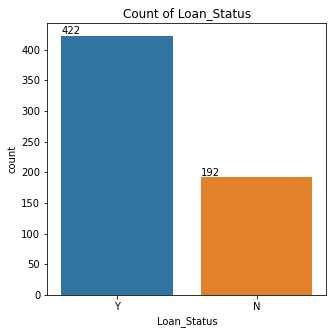

In [31]:
print(data['Loan_Status'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Loan_Status'])
ax.set_title("Count of Loan_Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

['Male' 'Female']


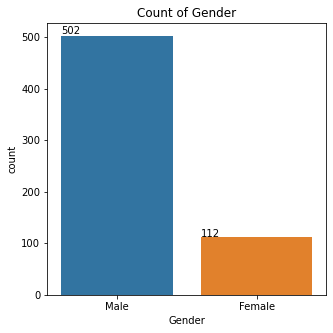

In [32]:
print(data['Gender'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Gender'])
ax.set_title("Count of Gender")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

['No' 'Yes']


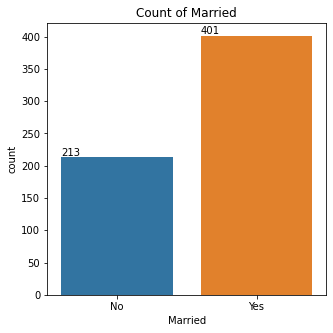

In [33]:
print(data['Married'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Married'])
ax.set_title("Count of Married")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

[0 1 2 3]


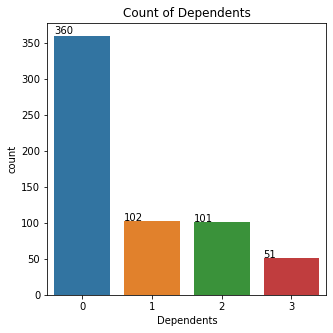

In [34]:
print(data['Dependents'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Dependents'])
ax.set_title("Count of Dependents")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

['Graduate' 'Not Graduate']


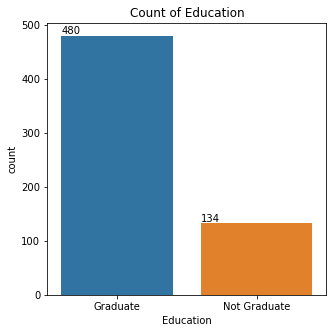

In [35]:
print(data['Education'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Education'])
ax.set_title("Count of Education")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

['No' 'Yes']


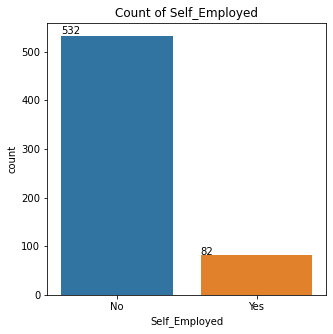

In [36]:
print(data['Self_Employed'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Self_Employed'])
ax.set_title("Count of Self_Employed")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

[360 120 240 180  60 300 480  36  84  12]


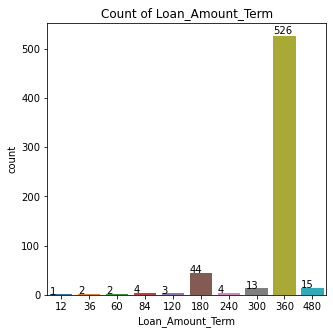

In [37]:
print(data['Loan_Amount_Term'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Loan_Amount_Term'])
ax.set_title("Count of Loan_Amount_Term")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

[1 0]


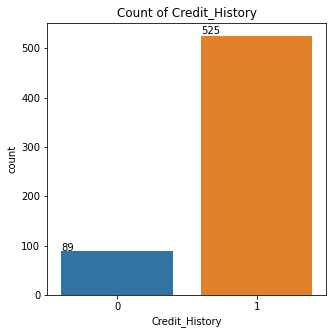

In [38]:
print(data['Credit_History'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Credit_History'])
ax.set_title("Count of Credit_History")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

['Urban' 'Rural' 'Semiurban']


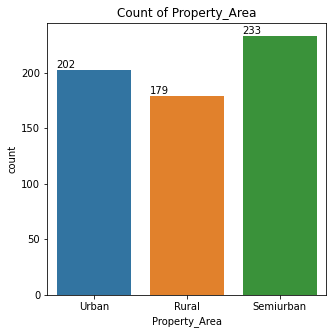

In [39]:
print(data['Property_Area'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Property_Area'])
ax.set_title("Count of Property_Area")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

Male      502
Female    112
Name: Gender, dtype: int64


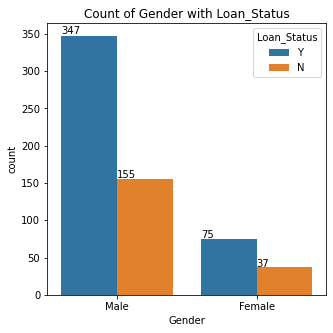

In [40]:
print(data['Gender'].value_counts())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Gender'],hue=data['Loan_Status'])
ax.set_title("Count of Gender with Loan_Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

Yes    401
No     213
Name: Married, dtype: int64


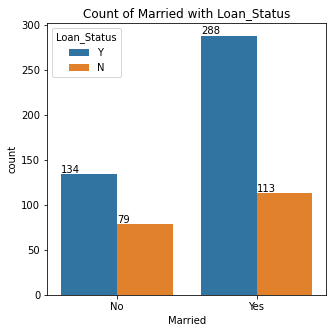

In [41]:
print(data['Married'].value_counts())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Married'],hue=data['Loan_Status'])
ax.set_title("Count of Married with Loan_Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64


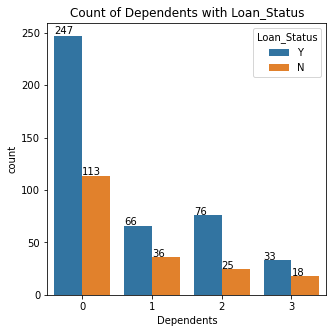

In [42]:
print(data['Dependents'].value_counts())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Dependents'],hue=data['Loan_Status'])
ax.set_title("Count of Dependents with Loan_Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


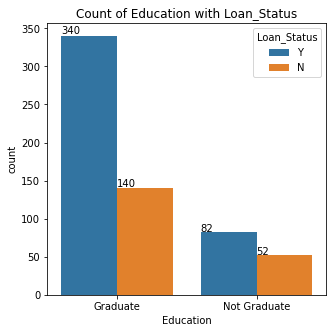

In [43]:
print(data['Education'].value_counts())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Education'],hue=data['Loan_Status'])
ax.set_title("Count of Education with Loan_Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

No     532
Yes     82
Name: Self_Employed, dtype: int64


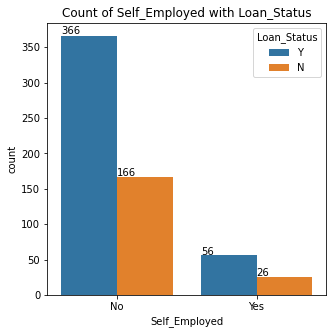

In [44]:
print(data['Self_Employed'].value_counts())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Self_Employed'],hue=data['Loan_Status'])
ax.set_title("Count of Self_Employed with Loan_Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

1    525
0     89
Name: Credit_History, dtype: int64


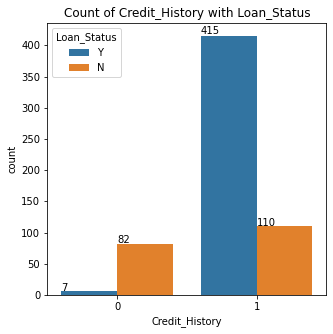

In [45]:
print(data['Credit_History'].value_counts())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Credit_History'],hue=data['Loan_Status'])
ax.set_title("Count of Credit_History with Loan_Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


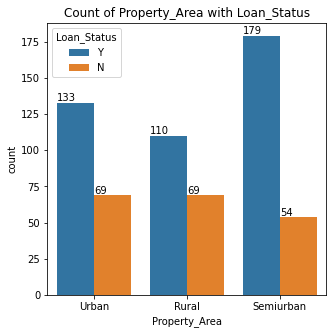

In [46]:
print(data['Property_Area'].value_counts())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['Property_Area'],hue=data['Loan_Status'])
ax.set_title("Count of Property_Area with Loan_Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

# Distributions of numerical features :

# "Applicant Income" distribution :

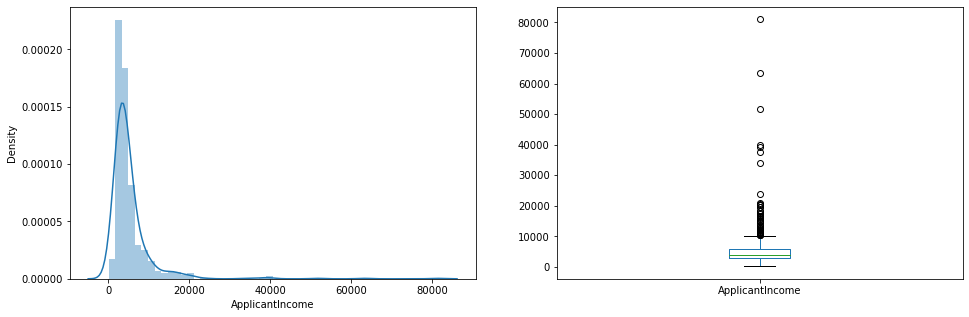

In [47]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data["ApplicantIncome"]);

plt.subplot(122)
data["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

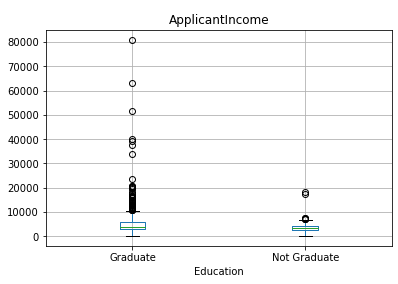

In [48]:
data.boxplot(column='ApplicantIncome',by="Education" )
plt.suptitle(" ")
plt.show()

# "Coapplicant Income" distribution:

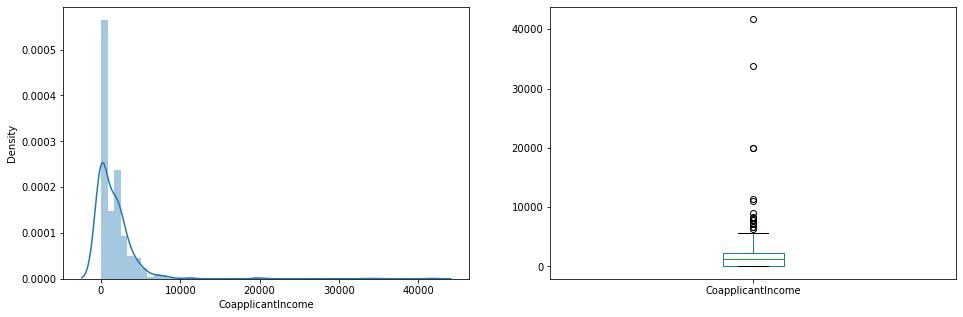

In [49]:
plt.subplot(121)
sns.distplot(data["CoapplicantIncome"]);

plt.subplot(122)
data["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

# "Loan Amount" distribution :

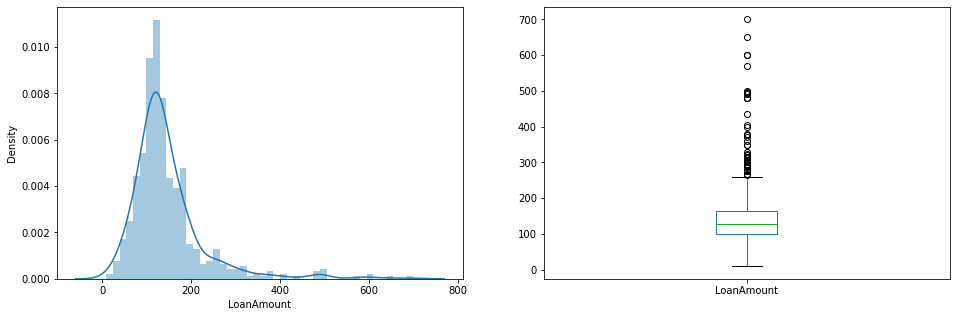

In [50]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['LoanAmount']);

plt.subplot(122)
data['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

# LoanAmountTerm distribution :

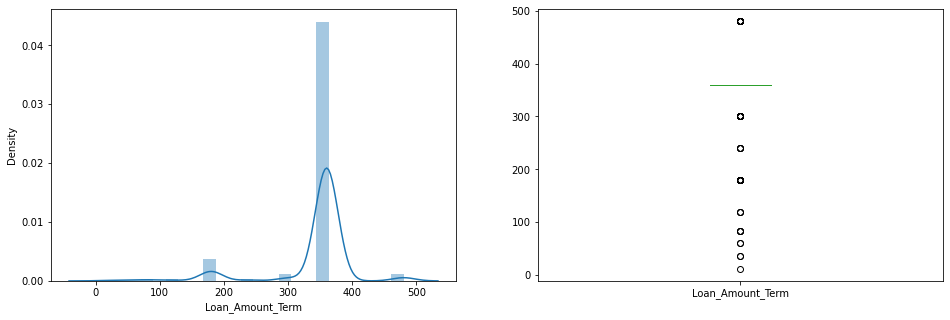

In [51]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data["Loan_Amount_Term"]);

plt.subplot(122)
data["Loan_Amount_Term"].plot.box(figsize=(16,5))
plt.show()

# Correlation among the features :

In [52]:
data['Loan_Status'].replace('N', 0,inplace=True)
data['Loan_Status'].replace('Y', 1,inplace=True)

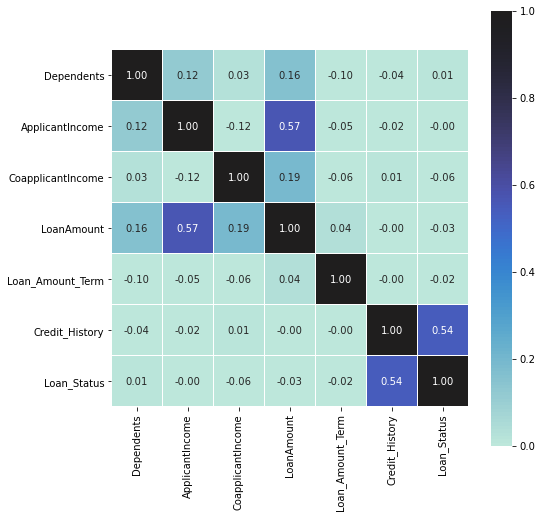

In [53]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(matrix, vmin=0,vmax=1, square=True, annot=True,center=True,fmt='.2f',linewidths=0.2)
plt.show()

# Log Transformation :

# Loan Amount :

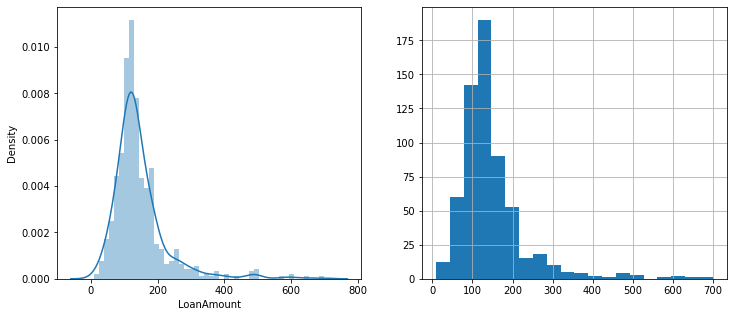

In [54]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data["LoanAmount"])
plt.subplot(122)
data['LoanAmount'].hist(bins=20)
plt.show()

# Log Transfomation of Loan amount feature :

In [55]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])

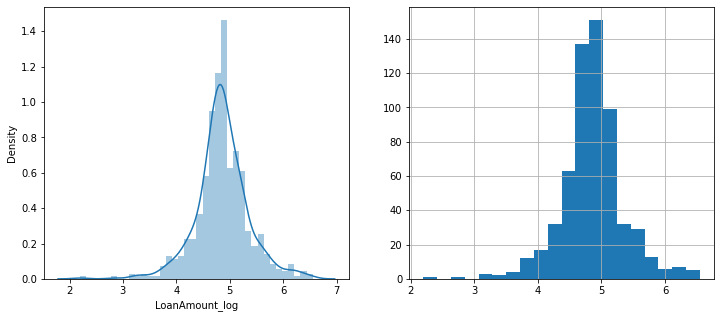

In [56]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data["LoanAmount_log"])
plt.subplot(122)
data['LoanAmount_log'].hist(bins=20)
plt.show()

# Applicant Income :

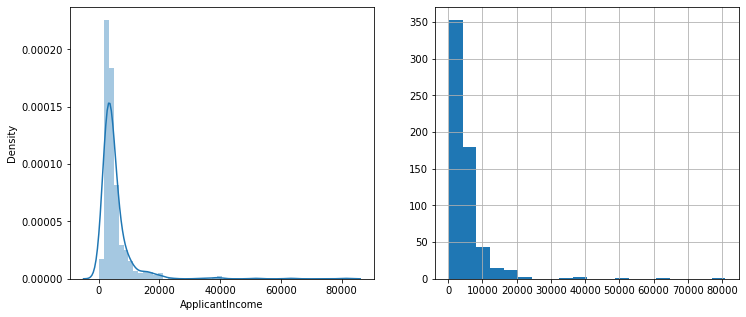

In [57]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data["ApplicantIncome"])
plt.subplot(122)
data['ApplicantIncome'].hist(bins=20)
plt.show()

# Log Transformation of Applicant Income :

In [58]:
data['ApplicantIncome_log'] = np.log(data['ApplicantIncome'])

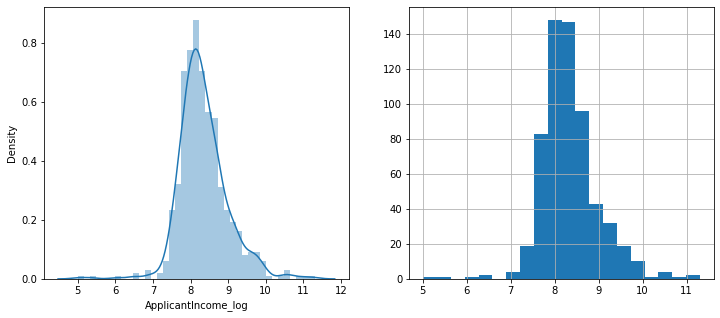

In [59]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data["ApplicantIncome_log"])
plt.subplot(122)
data['ApplicantIncome_log'].hist(bins=20)
plt.show()

# Coapplicant Income :

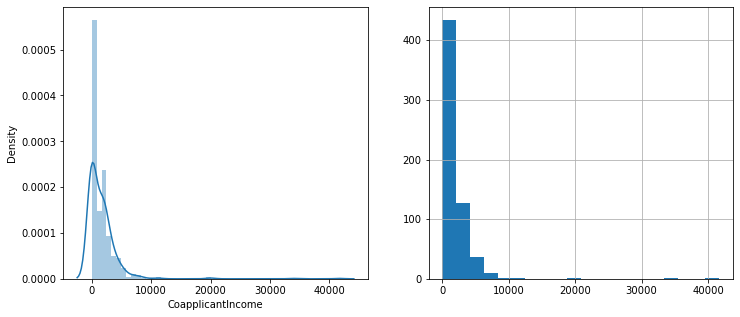

In [60]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data["CoapplicantIncome"])
plt.subplot(122)
data['CoapplicantIncome'].hist(bins=20)
plt.show()

# Log Transformation of Applicant Income :

In [61]:
data['CoapplicantIncome'].dtype

dtype('int64')

In [62]:
data['CoapplicantIncome_log']=np.log(np.log(data['CoapplicantIncome']))

In [63]:
data['CoapplicantIncome_log'].isnull().sum()

273

In [64]:
data['CoapplicantIncome_log']=data['CoapplicantIncome_log'].fillna(data['CoapplicantIncome_log'].median())

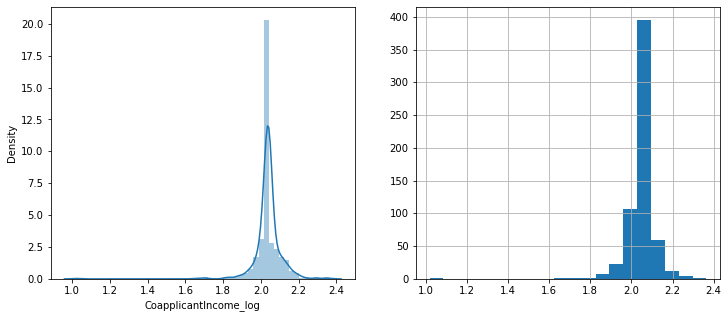

In [65]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data["CoapplicantIncome_log"])
plt.subplot(122)
data['CoapplicantIncome_log'].hist(bins=20)
plt.show()

# Feature Engineering :

# Total Income :

In [66]:
data["TotalIncome"]=data["ApplicantIncome"]+data["CoapplicantIncome"]

In [67]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,CoapplicantIncome_log,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0,128.0,360,1,Urban,1,4.852030,8.674026,2.038703,5849
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360,1,Rural,0,4.852030,8.430109,1.990411,6091
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360,1,Urban,1,4.189655,8.006368,2.038703,3000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360,1,Urban,1,4.787492,7.856707,2.049700,4941
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360,1,Urban,1,4.948760,8.699515,2.038703,6000


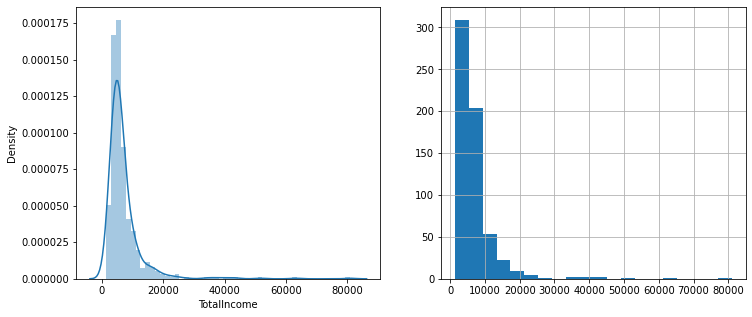

In [68]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data["TotalIncome"])
plt.subplot(122)
data['TotalIncome'].hist(bins=20)
plt.show()

# Log Transformation of Total Income :

In [69]:
data["TotalIncome_log"]=np.log(data["TotalIncome"])

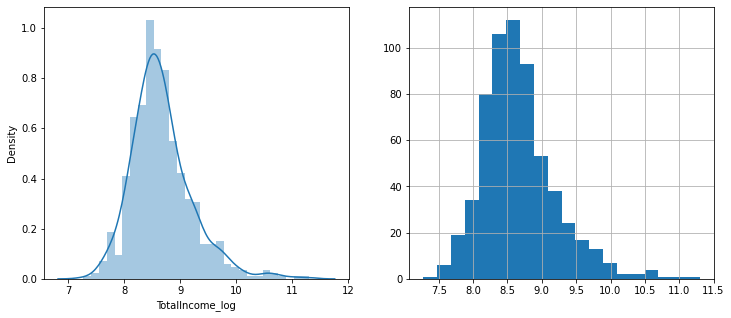

In [70]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data["TotalIncome_log"])
plt.subplot(122)
data['TotalIncome_log'].hist(bins=20)
plt.show()

# EMI Feature :

In [71]:
data["EMI"]=data["LoanAmount"]/data["Loan_Amount_Term"]

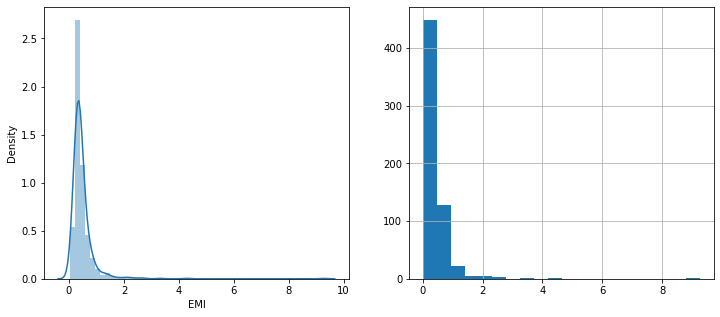

In [72]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data["EMI"])
plt.subplot(122)
data['EMI'].hist(bins=20)
plt.show()

# Log Transformation of EMI

In [73]:
data["EMI_log"]=np.log(data["EMI"])

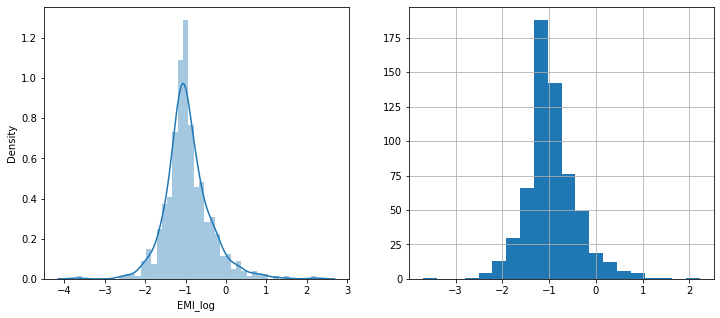

In [74]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data["EMI_log"])
plt.subplot(122)
data['EMI_log'].hist(bins=20)
plt.show()

# Balance Feature :

In [75]:
data["Balance_Income"] = data["TotalIncome"]-data["EMI"]*1000 # To make the units equal we multiply with 1000

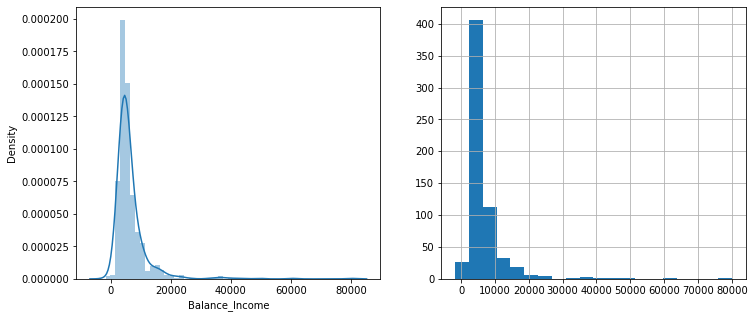

In [76]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data["Balance_Income"])
plt.subplot(122)
data['Balance_Income'].hist(bins=20)
plt.show()

# Log Transformation of Balance Feature

In [77]:
data["Balance_Income_log"]=np.log(np.log(data["Balance_Income"]))

In [78]:
data['Balance_Income_log'].isnull().sum()

2

In [79]:
data['Balance_Income_log']=data['Balance_Income_log'].fillna(data['Balance_Income_log'].median())

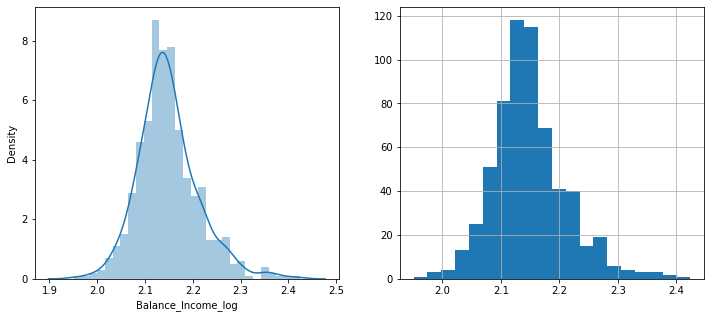

In [80]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data["Balance_Income_log"])
plt.subplot(122)
data['Balance_Income_log'].hist(bins=20)
plt.show()

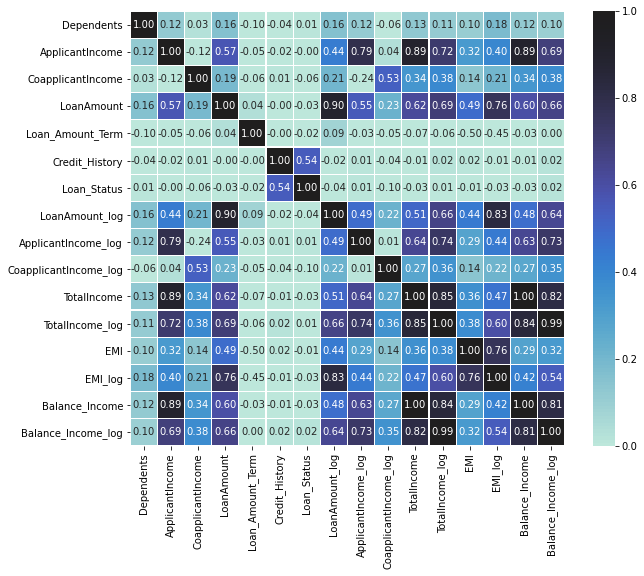

In [81]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(matrix, vmin=0,vmax=1, square=True, annot=True,center=True,fmt='.2f',linewidths=0.2)
plt.show()

# Model Building with log features :

In [82]:
data1=data.copy()

In [83]:
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Loan_Status,LoanAmount_log,ApplicantIncome_log,CoapplicantIncome_log,TotalIncome,TotalIncome_log,EMI,EMI_log,Balance_Income,Balance_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0,128.0,360,...,1,4.852030,8.674026,2.038703,5849,8.674026,0.355556,-1.034074,5493.444444,2.153077
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360,...,0,4.852030,8.430109,1.990411,6091,8.714568,0.355556,-1.034074,5735.444444,2.158070
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360,...,1,4.189655,8.006368,2.038703,3000,8.006368,0.183333,-1.696449,2816.666667,2.072330
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360,...,1,4.787492,7.856707,2.049700,4941,8.505323,0.333333,-1.098612,4607.666667,2.132446
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360,...,1,4.948760,8.699515,2.038703,6000,8.699515,0.391667,-0.937344,5608.333333,2.155477


# Converting Categorical features into numeric :

In [84]:
data1['Gender']=data1['Gender'].map({'Male':1,'Female':0})
data1['Married']=data1['Married'].map({'Yes':1,'No':0})
data1['Education']=data1['Education'].map({'Graduate':1,'Not Graduate':0})
data1['Self_Employed']=data1['Self_Employed'].map({'Yes':1,'No':0})
data1['Property_Area']=data1['Property_Area'].map({'Urban':1,'Rural':2,'Semiurban':3})

In [85]:
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Loan_Status,LoanAmount_log,ApplicantIncome_log,CoapplicantIncome_log,TotalIncome,TotalIncome_log,EMI,EMI_log,Balance_Income,Balance_Income_log
0,LP001002,1,0,0,1,0,5849,0,128.0,360,...,1,4.852030,8.674026,2.038703,5849,8.674026,0.355556,-1.034074,5493.444444,2.153077
1,LP001003,1,1,1,1,0,4583,1508,128.0,360,...,0,4.852030,8.430109,1.990411,6091,8.714568,0.355556,-1.034074,5735.444444,2.158070
2,LP001005,1,1,0,1,1,3000,0,66.0,360,...,1,4.189655,8.006368,2.038703,3000,8.006368,0.183333,-1.696449,2816.666667,2.072330
3,LP001006,1,1,0,0,0,2583,2358,120.0,360,...,1,4.787492,7.856707,2.049700,4941,8.505323,0.333333,-1.098612,4607.666667,2.132446
4,LP001008,1,0,0,1,0,6000,0,141.0,360,...,1,4.948760,8.699515,2.038703,6000,8.699515,0.391667,-0.937344,5608.333333,2.155477


# Dopping unnecessary columns :

In [86]:
data1=data1.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','TotalIncome_log','EMI','EMI_log','Balance_Income','Balance_Income_log'],axis=1)

In [87]:
data1.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,CoapplicantIncome_log
0,1,0,0,1,0,360,1,1,1,4.852030,8.674026,2.038703
1,1,1,1,1,0,360,1,2,0,4.852030,8.430109,1.990411
2,1,1,0,1,1,360,1,1,1,4.189655,8.006368,2.038703
3,1,1,0,0,0,360,1,1,1,4.787492,7.856707,2.049700
4,1,0,0,1,0,360,1,1,1,4.948760,8.699515,2.038703


In [88]:
data1.dtypes

Gender                     int64
Married                    int64
Dependents                 int64
Education                  int64
Self_Employed              int64
Loan_Amount_Term           int64
Credit_History             int64
Property_Area              int64
Loan_Status                int64
LoanAmount_log           float64
ApplicantIncome_log      float64
CoapplicantIncome_log    float64
dtype: object

# Separating features and labels

In [89]:
X=data1.drop(['Loan_Status'],axis=1)
y=data1['Loan_Status']

# Splitting the data into Train and Test datasets

In [90]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=2)

In [91]:
# Shape of the Training and Test data

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (491, 11) (491,)
Test set: (123, 11) (123,)


# Building KNN :

# Hyperparameter tuning using RandomizedSearchCv :

In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
neighbors = list(range(1,31, 2))
clf=KNeighborsClassifier()
param_grid = {'n_neighbors': neighbors}
KNN_cv=RandomizedSearchCV(estimator=clf,param_distributions=param_grid,n_iter=200,scoring='accuracy',cv=10,random_state=3,n_jobs=-1)
KNN_Randomecv=KNN_cv.fit(X_train,y_train)

In [93]:
KNN_Randomecv.best_params_

{'n_neighbors': 7}

# Standardizing the data :

In [94]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [95]:
KNN = KNeighborsClassifier(n_neighbors=7,n_jobs=-1)
KNN.fit(X_train_std, y_train)#fitting the model
y_train_pred=KNN.predict(X_train_std)
y_test_pred=KNN.predict(X_test_std)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred))

The Training Accuracy is : 0.8207739307535642
The Test Accuracy is : 0.7723577235772358


# Plotting ROC Curvres :

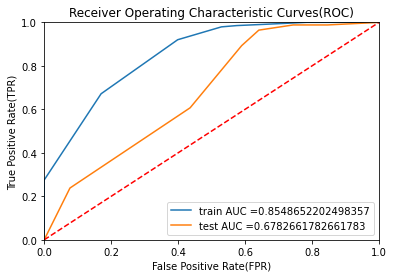

In [96]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  KNN.predict_proba(X_train_std)[:,1]
y_test_pred_proba=KNN.predict_proba(X_test_std)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

# Plotting Confusion Matrix

In [97]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

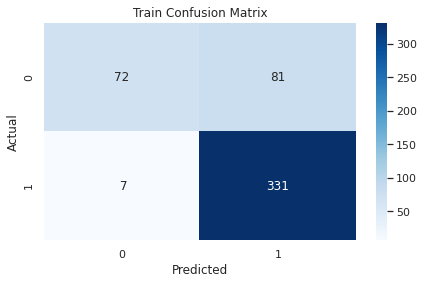

In [98]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

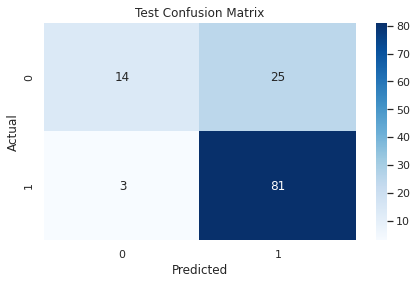

In [99]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

# Classification Report :

In [100]:
from sklearn.metrics import classification_report
Classificationreport_train=classification_report(y_train,y_train_pred)
Classificationreport_test=classification_report(y_test,y_test_pred)
print("Training Classification report is :",Classificationreport_train)
print("Testing Classification reportt is :",Classificationreport_test)

Training Classification report is :               precision    recall  f1-score   support

           0       0.91      0.47      0.62       153
           1       0.80      0.98      0.88       338

    accuracy                           0.82       491
   macro avg       0.86      0.72      0.75       491
weighted avg       0.84      0.82      0.80       491

Testing Classification reportt is :               precision    recall  f1-score   support

           0       0.82      0.36      0.50        39
           1       0.76      0.96      0.85        84

    accuracy                           0.77       123
   macro avg       0.79      0.66      0.68       123
weighted avg       0.78      0.77      0.74       123



# Saving KNN model for future purpose :

In [101]:
#from sklearn.externals import joblib
#joblib.dump(KNN,'KNN.pkl',compress=3)

# Building Logistic Regression

# Hyperparameter tuning using Randomizedseachcv :

In [102]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(penalty='l1',random_state=2,n_jobs=-1,solver='liblinear')
param_grid = {'C': [0.0001,0.001,0.01, 0.1, 1, 10, 100]}
Random_cv=RandomizedSearchCV(estimator=clf,param_distributions=param_grid,n_iter=100,scoring='accuracy',cv=10,random_state=3,n_jobs=-1)
Log_Randomecv=Random_cv.fit(X_train_std,y_train)

# Finding best parameters :

In [103]:
Log_Randomecv.best_params_

{'C': 0.01}

# Building Logistic Regression with best C value

In [104]:
log=LogisticRegression(C=0.01,penalty='l1',random_state=3,n_jobs=-1,solver='liblinear')
#Fitting the model
log.fit(X_train_std,y_train)
y_train_pred=log.predict(X_train_std)
y_test_pred=log.predict(X_test_std)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred))

The Training Accuracy is : 0.8187372708757638
The Test Accuracy is : 0.7723577235772358


# Plotting ROC Curves :

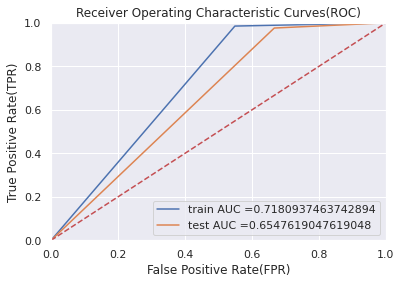

In [105]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  log.predict_proba(X_train_std)[:,1]
y_test_pred_proba=log.predict_proba(X_test_std)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

# Plotting Confusion Matrices :

In [106]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

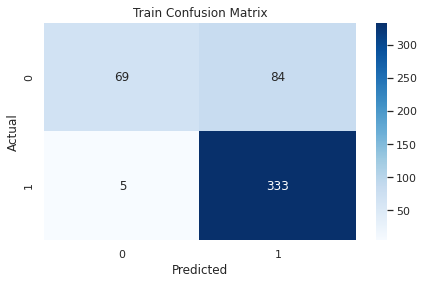

In [107]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

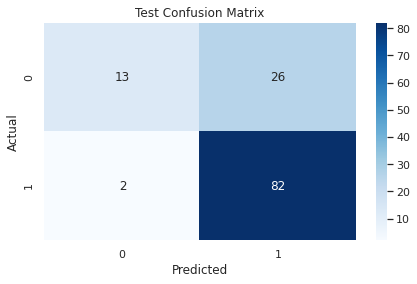

In [108]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

# Classification report :

In [109]:
from sklearn.metrics import classification_report
Classificationreport_train=classification_report(y_train,y_train_pred)
Classificationreport_test=classification_report(y_test,y_test_pred)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       0.93      0.45      0.61       153
           1       0.80      0.99      0.88       338

    accuracy                           0.82       491
   macro avg       0.87      0.72      0.75       491
weighted avg       0.84      0.82      0.80       491

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.87      0.33      0.48        39
           1       0.76      0.98      0.85        84

    accuracy                           0.77       123
   macro avg       0.81      0.65      0.67       123
weighted avg       0.79      0.77      0.74       123



# Building the model using Decision Tree

# Hyperparameter tuning using Randomizedcv :

In [110]:
from sklearn.model_selection import RandomizedSearchCV
# Assigning values to the parameters
depth=[5, 10, 50, 100, 500]
min_samples_split=[5,10,20,30,40,50]
criterion=["gini", "entropy"]
params_grid=dict(max_depth=depth,min_samples_split=min_samples_split,criterion=criterion)

In [111]:
# Estimator

from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(random_state=4)

In [112]:
# Building RandomizedsSearchCV

DT_RandomCV=RandomizedSearchCV(DT,params_grid,cv=10,n_iter=200,scoring='accuracy',n_jobs=-1)
DT_RandomCV.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=4),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 50, 100, 500],
                                        'min_samples_split': [5, 10, 20, 30, 40,
                                                              50]},
                   scoring='accuracy')

# Finding best parameters :

In [113]:
DT_RandomCV.best_params_

{'min_samples_split': 30, 'max_depth': 5, 'criterion': 'entropy'}

# Building Decision Tree model using best parameters

In [114]:
DT_clf=DecisionTreeClassifier(min_samples_split=30,max_depth=5,criterion='entropy',random_state=5,class_weight='balanced')
DT_clf.fit(X_train,y_train)
y_pred_train_DT=DT_clf.predict(X_train)
y_pred_test_DT=DT_clf.predict(X_test)
print("The Training Accuracy is :",accuracy_score(y_train,y_pred_train_DT))
print("The Test Accuracy is :",accuracy_score(y_test,y_pred_test_DT))

The Training Accuracy is : 0.8370672097759674
The Test Accuracy is : 0.7398373983739838


# Plotiing ROC Curves :

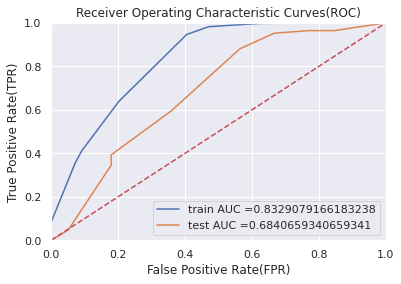

In [115]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  DT_clf.predict_proba(X_train)[:,1]
y_test_pred_proba=DT_clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

# Plotting Confusion Matrices :

In [116]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_pred_train_DT)
Test_Confusion_Matrix=confusion_matrix(y_test,y_pred_test_DT)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

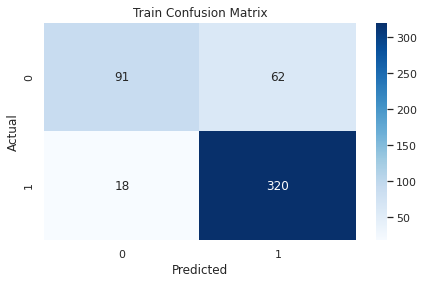

In [117]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

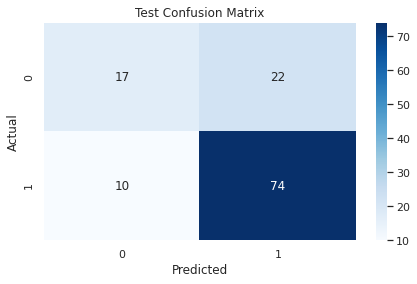

In [118]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

# Classification report :

In [119]:
from sklearn.metrics import classification_report
Classificationreport_train=classification_report(y_train,y_pred_train_DT)
Classificationreport_test=classification_report(y_test,y_pred_test_DT)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       0.83      0.59      0.69       153
           1       0.84      0.95      0.89       338

    accuracy                           0.84       491
   macro avg       0.84      0.77      0.79       491
weighted avg       0.84      0.84      0.83       491

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.63      0.44      0.52        39
           1       0.77      0.88      0.82        84

    accuracy                           0.74       123
   macro avg       0.70      0.66      0.67       123
weighted avg       0.73      0.74      0.72       123



# Building Random Forest model

# Hyperparameter tuning using Randomizedsearchcv

In [120]:
# Assigning values to the parameters

depth=[5, 10, 20,30]
min_samples_split=[5,10,20,30,40,50]
estimators=[50,100,150,200]
criterion=["gini", "entropy"]
params_grid=dict(n_estimators=estimators,max_depth=depth,min_samples_split=min_samples_split,criterion=criterion)
params_grid

{'n_estimators': [50, 100, 150, 200],
 'max_depth': [5, 10, 20, 30],
 'min_samples_split': [5, 10, 20, 30, 40, 50],
 'criterion': ['gini', 'entropy']}

In [121]:
# Estimator

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=2,n_jobs=-1)

In [122]:
# Building RandomizedsSearchCV

RF_RandomCV=RandomizedSearchCV(RF,params_grid,cv=10,scoring='accuracy',n_jobs=-1,n_iter=100)
RF_RandomCV.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=2),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 20, 30],
                                        'min_samples_split': [5, 10, 20, 30, 40,
                                                              50],
                                        'n_estimators': [50, 100, 150, 200]},
                   scoring='accuracy')

# Finding best parameters :

In [123]:
RF_RandomCV.best_params_

{'n_estimators': 200,
 'min_samples_split': 30,
 'max_depth': 10,
 'criterion': 'entropy'}

# Building Random Forest model using best parameters :

In [124]:
RF_clf=RandomForestClassifier(n_estimators=200,min_samples_split=30,max_depth=30,criterion='gini',random_state=3,n_jobs=-1)
RF_clf.fit(X_train,y_train)
y_train_pred_RF=RF_clf.predict(X_train)
y_test_pred_RF=RF_clf.predict(X_test)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred_RF))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred_RF))

The Training Accuracy is : 0.8391038696537678
The Test Accuracy is : 0.7560975609756098


# Plotting ROC Curves :

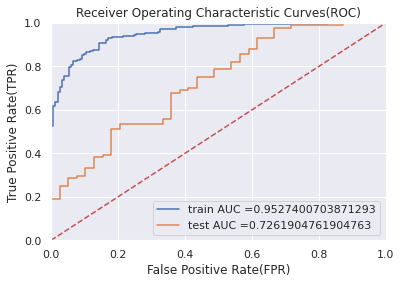

In [125]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  RF_clf.predict_proba(X_train)[:,1]
y_test_pred_proba=RF_clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

# Plotting Confusion Matrices :

In [126]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred_RF)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred_RF)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

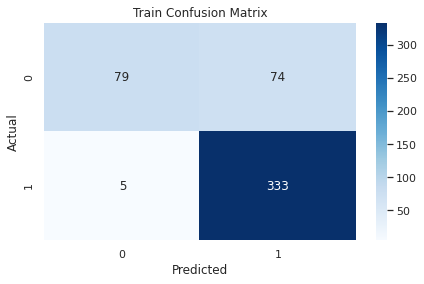

In [127]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

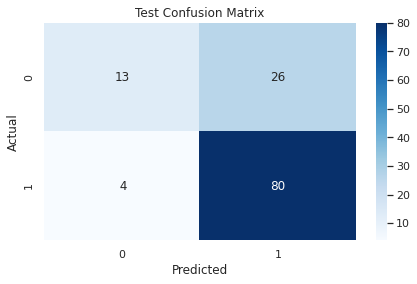

In [128]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

# Classification report :

In [129]:
from sklearn.metrics import classification_report
Classificationreport_train=classification_report(y_train,y_train_pred_RF)
Classificationreport_test=classification_report(y_test,y_test_pred_RF)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       0.94      0.52      0.67       153
           1       0.82      0.99      0.89       338

    accuracy                           0.84       491
   macro avg       0.88      0.75      0.78       491
weighted avg       0.86      0.84      0.82       491

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.76      0.33      0.46        39
           1       0.75      0.95      0.84        84

    accuracy                           0.76       123
   macro avg       0.76      0.64      0.65       123
weighted avg       0.76      0.76      0.72       123



# Building XGBOOST Classifier

# Hyperparameter tuning

In [130]:
from sklearn.model_selection import RandomizedSearchCV
# Assigning values to the parameters
depth=[1, 5, 10, 50, 100, 200]
estimators=[50,70,90,110,130,150,170]
params_grid=dict(max_depth=depth,n_estimators=estimators)

In [131]:
# Estimator

from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=5,n_jobs=-1)

In [132]:
# Building RandomizedsSearchCV

xgb_RandomCV=RandomizedSearchCV(xgb,params_grid,cv=5,scoring='accuracy',n_jobs=-1)
xgb_RandomCV.fit(X_train,y_train)

[12:09:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=-1,
                                           num_parallel_tree=None,
                                           random_state=5, reg_alpha=None,
                               

# Finding best parameters :

In [133]:
xgb_RandomCV.best_params_

{'n_estimators': 50, 'max_depth': 100}

# Building Xgboost with best parameters

In [134]:
XGB=XGBClassifier(n_estimators=70,max_depth=1,random_state=6,n_jobs=-1)
XGB.fit(X_train,y_train)
y_train_pred_XGBF=XGB.predict(X_train)
y_test_pred_XGB=XGB.predict(X_test)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred_XGBF))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred_XGB))

[12:09:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Training Accuracy is : 0.8289205702647657
The Test Accuracy is : 0.7560975609756098


# Plotting ROC Curves :

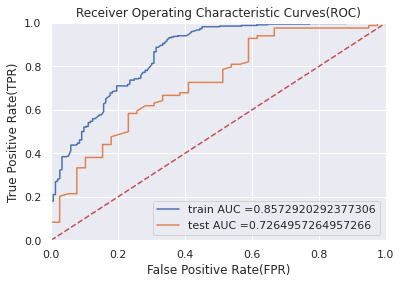

In [135]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  XGB.predict_proba(X_train)[:,1]
y_test_pred_proba=XGB.predict_proba(X_test)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

# Confusion Matrices :

In [136]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred_XGBF)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred_XGB)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

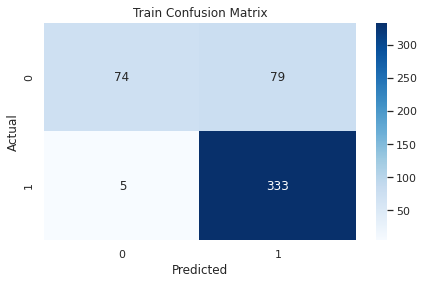

In [137]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

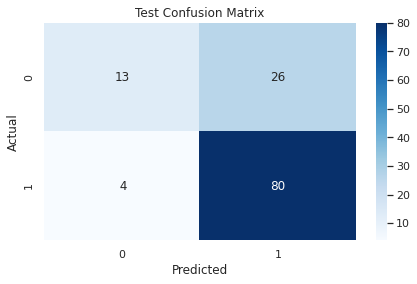

In [138]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

# Classification Report :

In [139]:
from sklearn.metrics import classification_report
Classificationreport_train=classification_report(y_train,y_train_pred_XGBF)
Classificationreport_test=classification_report(y_test,y_test_pred_XGB)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       0.94      0.48      0.64       153
           1       0.81      0.99      0.89       338

    accuracy                           0.83       491
   macro avg       0.87      0.73      0.76       491
weighted avg       0.85      0.83      0.81       491

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.76      0.33      0.46        39
           1       0.75      0.95      0.84        84

    accuracy                           0.76       123
   macro avg       0.76      0.64      0.65       123
weighted avg       0.76      0.76      0.72       123



# Comparing the performance of models using Pretty Table

In [140]:
from prettytable import PrettyTable
x=PrettyTable()

In [141]:
x.field_names=['Model_Name','Train_AUC','Test_AUC','Traing_Acc','Test_Acc']

In [142]:
x.add_row(['KNN',85.48,67.82,82.07,77.23])
x.add_row(['Logistic_Regression',71.80,65.47,81.87,77.23])
x.add_row(['Decision Tree',83.29,68.40,83.70,73.98])
x.add_row(['Random_Forest',5.27,72.61,83.91,75.60])
x.add_row(['Xgboost',82.23,70.78,82.28,75.60])

In [143]:
print(x)

+---------------------+-----------+----------+------------+----------+
|      Model_Name     | Train_AUC | Test_AUC | Traing_Acc | Test_Acc |
+---------------------+-----------+----------+------------+----------+
|         KNN         |   85.48   |  67.82   |   82.07    |  77.23   |
| Logistic_Regression |    71.8   |  65.47   |   81.87    |  77.23   |
|    Decision Tree    |   83.29   |   68.4   |    83.7    |  73.98   |
|    Random_Forest    |    5.27   |  72.61   |   83.91    |   75.6   |
|       Xgboost       |   82.23   |  70.78   |   82.28    |   75.6   |
+---------------------+-----------+----------+------------+----------+


# Conclusion :